# California Housing Price Prediction

This project focuses on predicting **median house values in California districts** using the **California Housing dataset**.  
The dataset contains information such as median income, average number of rooms, house age, and geographical location.  

### Objectives
- Perform **data cleaning** (handling outliers, missing values, skewed distributions).  
- Conduct **exploratory data analysis (EDA)** to understand feature distributions and relationships.  
- Apply **feature engineering** and scaling to prepare the dataset.  
- Train and evaluate different regression models:  
  - Linear Regression (Baseline)  
  - Ridge & Lasso Regression (Regularization)  
  - Random Forest Regression (Advanced, non-linear model)  
- Compare model performances and extract insights on the most important features.  

### Why This Project?
Predicting housing prices is a **classic machine learning regression task**.  
It demonstrates key skills in:  
- Data preprocessing  
- Model building and evaluation  
- Visualization and result interpretation  

The final deliverable is a **clean, reproducible pipeline** with code, visualizations, and a summary of results.  

## 1. Data Loading and Initial Exploration

We start by using the **California Housing dataset**, a classic dataset from `scikit-learn` that contains information about housing in California districts, including median income, house age, average number of rooms, population, and geographical coordinates. The target variable is the **median house value** (MedHouseVal).

In this step:
- We load the dataset using `fetch_california_housing`.
- Convert it into a pandas DataFrame for easier exploration.
- Add the target column (`MedHouseVal`) to the DataFrame.
- Display the first few rows and the dataset dimensions.

 **Output**:  
- The head of the dataset (first 5 rows) shows features such as `MedInc`, `HouseAge`, `AveRooms`, etc. along with `MedHouseVal`.  
- The dataset contains **20,640 rows** and **9 columns** (8 features + 1 target).  

In [3]:
from sklearn.datasets import fetch_california_housing

# **Local download and storage**
housing = fetch_california_housing(download_if_missing=True)
X, y = housing.data, housing.target

# **Display the first few samples**
import pandas as pd
df = pd.DataFrame(X, columns=housing.feature_names)
df['MedHouseVal'] = y
print(df.head())
print(df.shape)

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
(20640, 9)


## 2. Dataset Inspection and Summary

Before moving on to preprocessing and modeling, it’s important to carefully **inspect the dataset** to understand its structure, data types, and quality.

In this step, we perform the following checks:
- **Preview the first 5 rows** to get a quick look at the features and values.
- **Dataset info (`df.info()`)**: confirms data types (all numerical) and shows no missing values.
- **Missing values check**: verifies that the dataset is complete with no null values.
- **Descriptive statistics (`df.describe()`)**: provides summary statistics (mean, std, min, max, quartiles) for each feature.

 **Key Observations**:
- The dataset contains **only numerical variables** (no categorical features).  
- There are **no missing values**, so imputation is not required.  
- Feature distributions vary widely (e.g., `MedInc` ranges from very low to high values, `HouseAge` includes old houses).  

In [5]:
#Inspect the dataset

#Display first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

#check dataset info(data types, non-null counts)
print("\n dataset info:")
df.info()

#check for missing values
print("\n missing values:")
print(df.isna().sum())

#Descriptive statistics
print("\n descriptive stratistics")
display(df.describe())

First 5 rows of the dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422



 dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB

 missing values:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

 descriptive stratistics


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


##  3.  Handling Outliers

Outliers can distort the distribution of variables and negatively affect model performance.  
To address this, I used the **Interquartile Range (IQR) method**:

- For each selected column (`Population`, `AveRooms`, `AveBedrms`, `AveOccup`), I calculated **Q1**, **Q3**, and the **IQR**.  
- Any value outside the range `[Q1 - 1.5*IQR, Q3 + 1.5*IQR]` was considered an outlier and removed.  
- After applying this filtering step, the dataset size reduced from **20,640 rows** to **17,289 rows**.  

 This ensures the dataset is cleaner and less influenced by extreme values, making the later modeling process more robust.

In [7]:
# Detect and handle outliers using IQR
def remove_outliers_iqr(df, columns):
    cleaned_df = df.copy()
    for col in columns:
        Q1 = cleaned_df[col].quantile(0.25)
        Q3 = cleaned_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        before_rows = cleaned_df.shape[0]
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]
        after_rows = cleaned_df.shape[0]
        
        print(f"{col}: Removed {before_rows - after_rows} rows")
    
    return cleaned_df

# **Columns that have outliers**
outlier_cols = ["Population", "AveRooms", "AveBedrms", "AveOccup"]

# **Clean dataset**
df_clean = remove_outliers_iqr(df, outlier_cols)

print("Shape before:", df.shape)
print("Shape after :", df_clean.shape)

Population: Removed 1196 rows
AveRooms: Removed 513 rows
AveBedrms: Removed 1083 rows
AveOccup: Removed 559 rows
Shape before: (20640, 9)
Shape after : (17289, 9)


## 4. Visualizing Outlier Removal

To better understand the effect of removing outliers, I plotted **histograms** of the selected columns both **before** and **after** applying the IQR-based filtering.  

- The plots clearly show how extreme values (long tails or unusual spikes) are reduced after cleaning.  
- This step confirms that the dataset distribution is now more balanced and suitable for modeling.  

 Visualization is a key step here: it not only validates the cleaning process but also gives intuition about the data’s natural range.

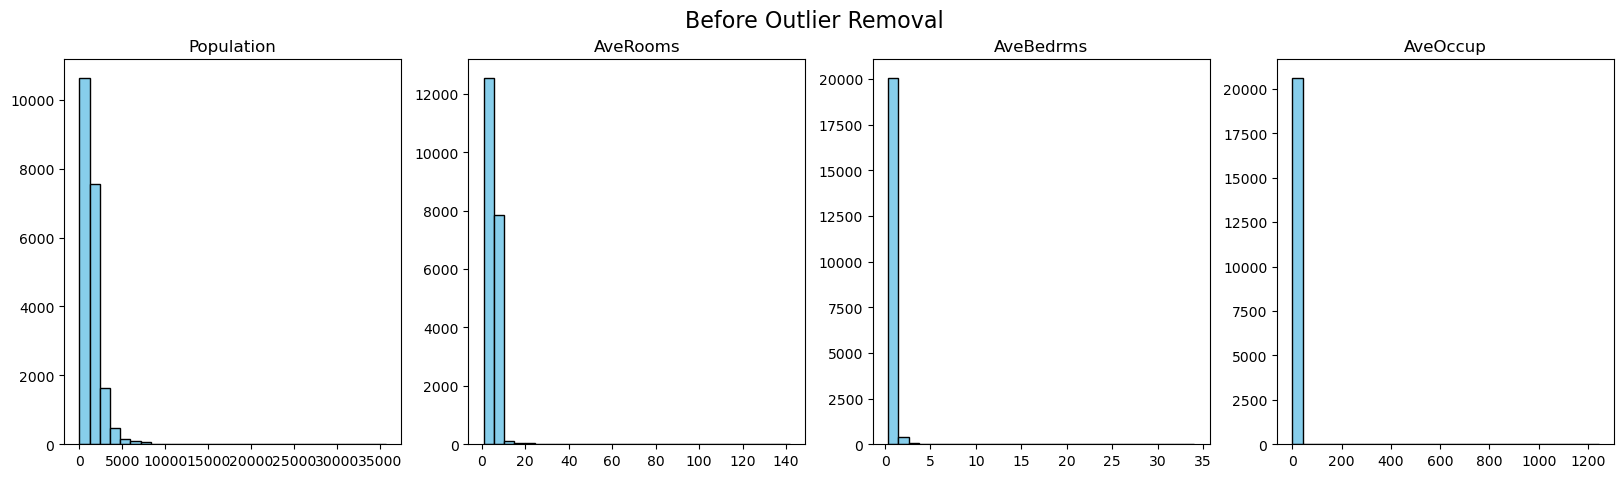

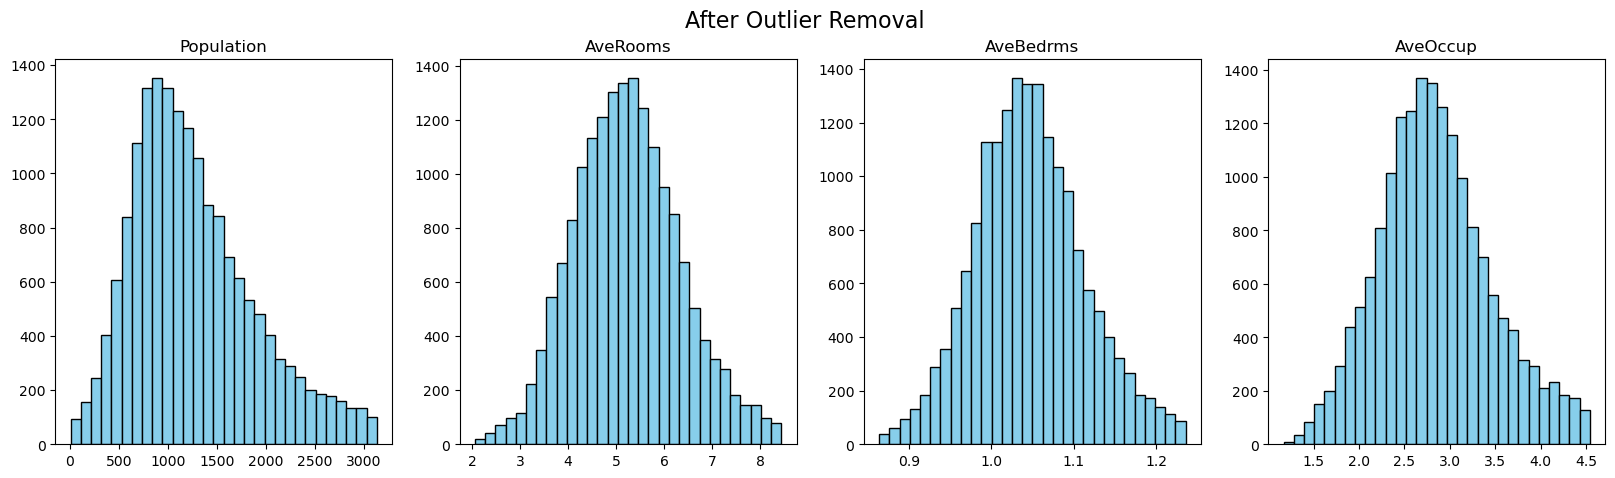

In [9]:
import matplotlib.pyplot as plt

def plot_histograms(df, columns, title):
    fig, axes = plt.subplots(1, len(columns), figsize=(20, 5))
    fig.suptitle(title, fontsize=16)
    for i, col in enumerate(columns):
        axes[i].hist(df[col], bins=30, color="skyblue", edgecolor="black")
        axes[i].set_title(col)
    plt.show()

# Before Delete
plot_histograms(df, outlier_cols, "Before Outlier Removal")

# After Delete
plot_histograms(df_clean, outlier_cols, "After Outlier Removal")

## 5. Log Transformation for Skewed Features  

Some features in the dataset (e.g., **Population**, **AveRooms**, **AveOccup**) showed a **skewed distribution** with long tails.  
To reduce skewness and make the data closer to a normal distribution, I applied a **log transformation** (`log1p`, i.e., log(1+x)).  

- This transformation helps stabilize variance.  
- It improves the performance of linear models by aligning feature distributions with the assumptions of regression.  
- Using `log1p` avoids issues with zero values.  

After transformation, the values of these columns are now more compressed and normally distributed, which is better suited for modeling.

In [11]:
import numpy as np

skewed_cols = ["Population", "AveRooms", "AveOccup"]

for col in skewed_cols:
    df_clean[col] = np.log1p(df_clean[col])  # **`log1p` means `log(1 + x)` → used to avoid `log(0)`**

print(df_clean[skewed_cols].head())

   Population  AveRooms  AveOccup
0    5.777652  2.077455  1.268511
1    7.784057  1.979364  1.134572
2    6.208590  2.228738  1.335596
3    6.326149  1.919471  1.266369
4    6.338594  1.985385  1.157342


## 6. Distribution Check After Log Transformation  

After applying the **log1p transformation** to the skewed features (`Population`, `AveRooms`, `AveOccup`),  
it’s essential to re-check their distributions.  

The histograms below confirm:  
- The features are now much closer to a **normal distribution**.  
- Extreme long tails have been reduced.  
- This preprocessing step makes the data more suitable for regression models.  

By visualizing before/after transformations, we ensure that our feature engineering actually improved the data quality.

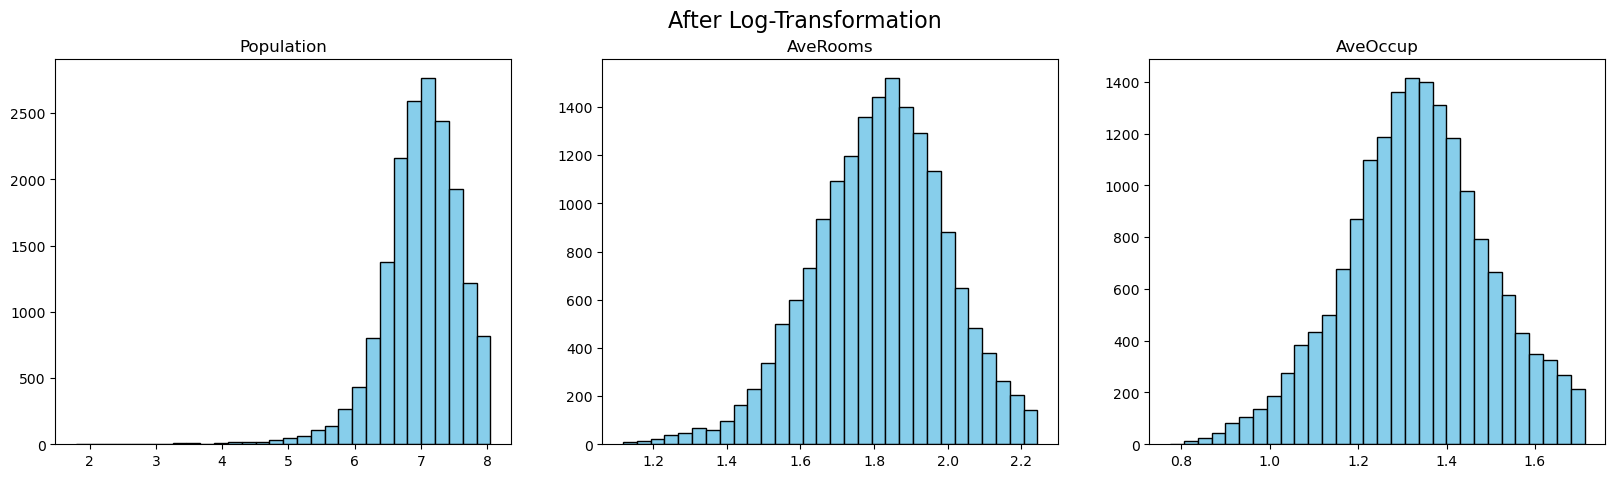

In [14]:
# Re-check distributions after log-transform
plot_histograms(df_clean, skewed_cols, "After Log-Transformation")

## 7. Feature Scaling with StandardScaler

We standardize the features using **StandardScaler** to ensure they have zero mean and unit variance,  
making them comparable and suitable for models like **Linear Regression** or **Neural Networks**.

In [18]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_clean.drop("MedHouseVal", axis=1)  
y = df_clean["MedHouseVal"]              

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
import pandas as pd
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled)

[[ 2.48024996  0.92433704  1.45377547 ... -0.39544825  1.04962908
  -1.30252141]
 [ 2.46694901 -0.70323269  0.91223434 ... -1.21843174  1.04021897
  -1.29750561]
 [ 1.88349553  1.81950039  2.28897093 ...  0.01674728  1.03551391
  -1.3075372 ]
 ...
 [-1.22233243 -1.02874664  0.06247186 ... -0.80620839  1.77891251
  -0.79592649]
 [-1.12889045 -0.94736815  0.17167492 ... -1.19207707  1.77891251
  -0.8460844 ]
 [-0.83749903 -1.11012513  0.10604739 ... -0.2902037   1.75068218
  -0.80595807]]


## 8. Correlation Heatmap

To get a clear picture of how our features relate to each other, we calculate the **correlation matrix** and visualize it with a **heatmap**.  

This makes it easy to spot:  
- Features that are **strongly correlated**, which might be redundant or cause multicollinearity.  
- Features that are **weakly correlated**, indicating they provide unique information.  

Doing this helps us make better decisions for **feature selection**, improves **model interpretability**, and highlights areas where preprocessing might be needed.

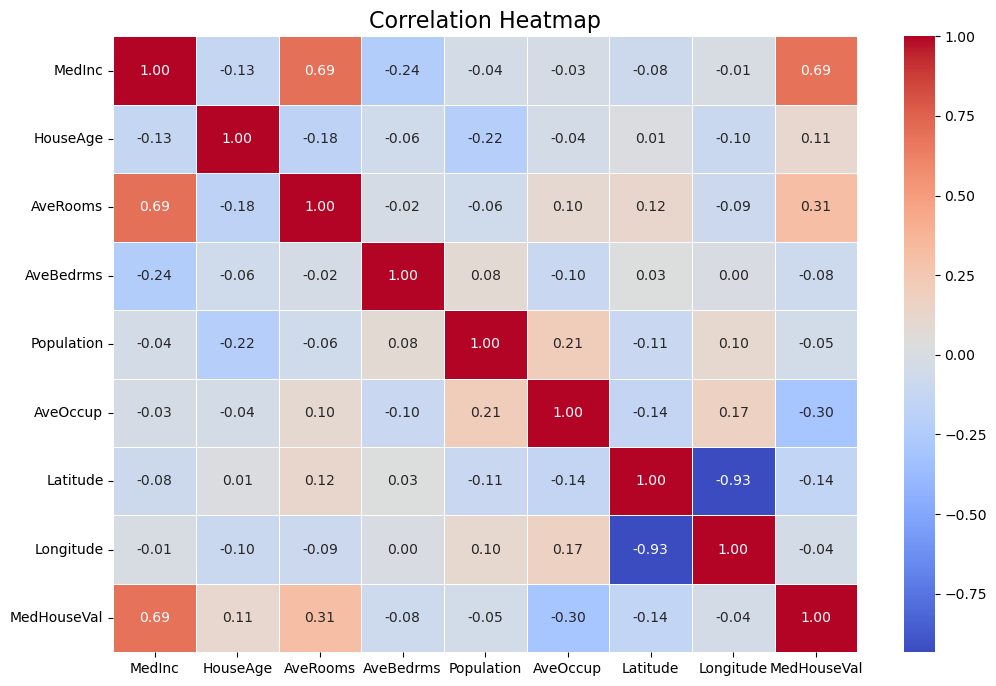

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_clean.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

## 9. Train-Test Split

We split the dataset into **training** and **test sets** to evaluate model performance on unseen data.  

- **Training set (80%)**: used for fitting the model  
- **Test set (20%)**: used for evaluation  

`X` contains normalized features, `y` is the original target (`MedHouseVal`).  
The split ensures reproducibility with `random_state=42`.

**Output shapes:**  
- Train: `(13831, 8)` features, `(13831,)` target  
- Test: `(3458, 8)` features, `(3458,)` target

This step is essential to **prevent overfitting** and assess how well the model generalizes.

In [22]:
from sklearn.model_selection import train_test_split

#X: Features (all columns except the target)
#y: Target variable (MedHouseVal)


X = df_scaled  # **Normalized data**
y = df_clean["MedHouseVal"].values  # Original target without changes

# (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (13831, 8) (13831,)
Test shape: (3458, 8) (3458,)


## 10. Target Distribution Check

It’s important to ensure that the **target variable (`MedHouseVal`)** is similarly distributed in both training and test sets.  

Here we check the **mean and standard deviation** of `y_train` and `y_test` and visualize the distributions with histograms.

**Observations:**  
- `y_train` mean ≈ 2.10, std ≈ 1.15  
- `y_test`  mean ≈ 2.08, std ≈ 1.12  
- The histograms confirm that the **train and test distributions are similar**, which is crucial for reliable model evaluation.

By doing this, we verify that the **train-test split did not introduce bias** in the target distribution.


y_train: mean, std = 2.1038230923288266 1.1518225722710467
y_test : mean, std = 2.076430980335454 1.1183259298402106


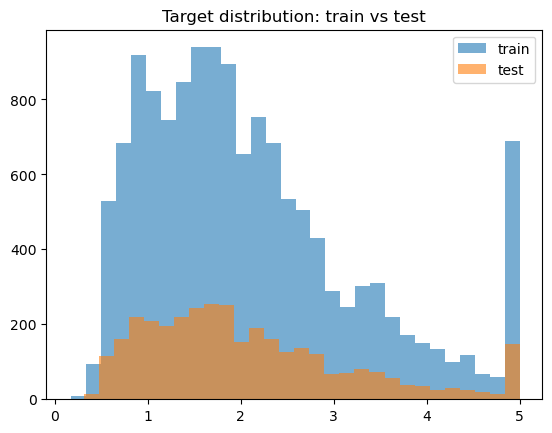

In [24]:
import numpy as np
import matplotlib.pyplot as plt

print("y_train: mean, std =", np.mean(y_train), np.std(y_train))
print("y_test : mean, std =", np.mean(y_test), np.std(y_test))

plt.hist(y_train, bins=30, alpha=0.6, label='train')
plt.hist(y_test, bins=30,  alpha=0.6, label='test')
plt.legend(); plt.title("Target distribution: train vs test"); plt.show()

## 11. Train-Test Split with Scaling

Here, we **split the data first** and then apply **StandardScaler** only on the training set to prevent data leakage.  
The test set is scaled using the parameters learned from the training set.

**Process:**  
1. Split `X_unscaled` and `y` into **train (80%)** and **test (20%)** sets.  
2. Fit `StandardScaler` on `X_train` and transform both `X_train` and `X_test`.  
3. Optionally, convert the scaled arrays back to `DataFrame` for readability.

**Output shapes:**  
- Train: `(13831, 8)` features, `(13831,)` target  
- Test: `(3458, 8)` features, `(3458,)` target

This ensures that **scaling is done correctly** without leaking information from the test set, maintaining model integrity.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

X_unscaled = df_clean.drop("MedHouseVal", axis=1)
y = df_clean["MedHouseVal"].values

# split first
X_train_u, X_test_u, y_train, y_test = train_test_split(X_unscaled, y, test_size=0.2, random_state=42)

# then fit scaler only on train
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_u)
X_test  = scaler.transform(X_test_u)

# optional: convert back to DataFrame for readability
X_train = pd.DataFrame(X_train, columns=X_unscaled.columns, index=X_train_u.index)
X_test  = pd.DataFrame(X_test,  columns=X_unscaled.columns, index=X_test_u.index)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape: ", X_test.shape,  y_test.shape)

Train shape: (13831, 8) (13831,)
Test shape:  (3458, 8) (3458,)


## 12. Linear Regression Model

We train a **Linear Regression** model on the scaled training set and evaluate it on the test set.

**Evaluation metrics:**  
- **MSE (Mean Squared Error):** 0.389  
- **RMSE (Root Mean Squared Error):** 0.624  
- **MAE (Mean Absolute Error):** 0.465  
- **R² (Coefficient of Determination):** 0.689  

**Visual analysis:**  
- **Actual vs Predicted:** scatter plot showing how well predictions align with actual values.  
- **Residuals vs Predicted:** helps check for patterns in residuals; ideally, residuals should be randomly scattered around zero.

This step confirms the model’s performance and highlights areas where predictions are more or less accurate.

MSE: 0.3894624287735127
RMSE: 0.6240692499823338
MAE: 0.46475960770020514
R2: 0.6885927075892087


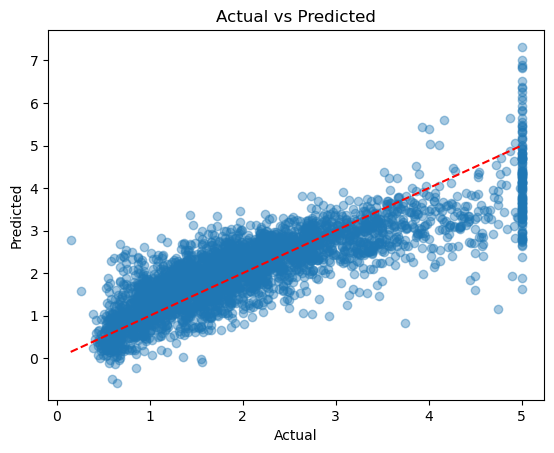

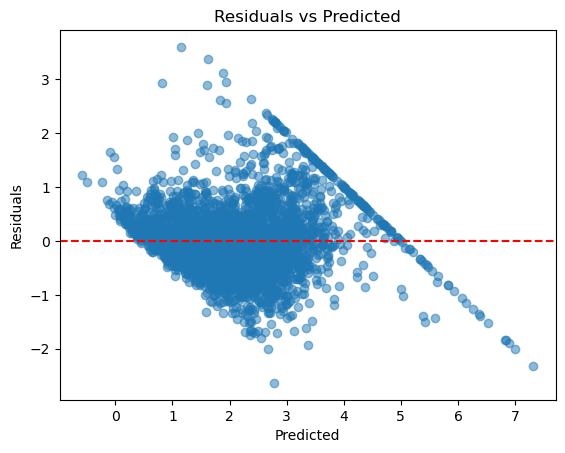

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Assume `X_train`, `X_test`, `y_train`, and `y_test` are ready
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

# Actual vs Predicted
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual"); plt.ylabel("Predicted"); plt.title("Actual vs Predicted")
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted"); plt.ylabel("Residuals"); plt.title("Residuals vs Predicted")
plt.show()

## 13. Linear Regression Coefficients

We look at the **model coefficients** to see how each feature affects the target (`MedHouseVal`).

**Key points:**  
- **Positive coefficients** (e.g., `MedInc`, `HouseAge`) increase the predicted value.  
- **Negative coefficients** (e.g., `Latitude`, `Longitude`, `AveOccup`) decrease the predicted value.  

**Visualization:**  
A horizontal bar chart helps compare the **strength and direction** of each feature’s impact.

      Feature  Coefficient
0      MedInc     0.835365
1    HouseAge     0.150473
3   AveBedrms     0.106153
4  Population     0.040037
2    AveRooms    -0.134596
5    AveOccup    -0.288662
7   Longitude    -0.822329
6    Latitude    -0.891827


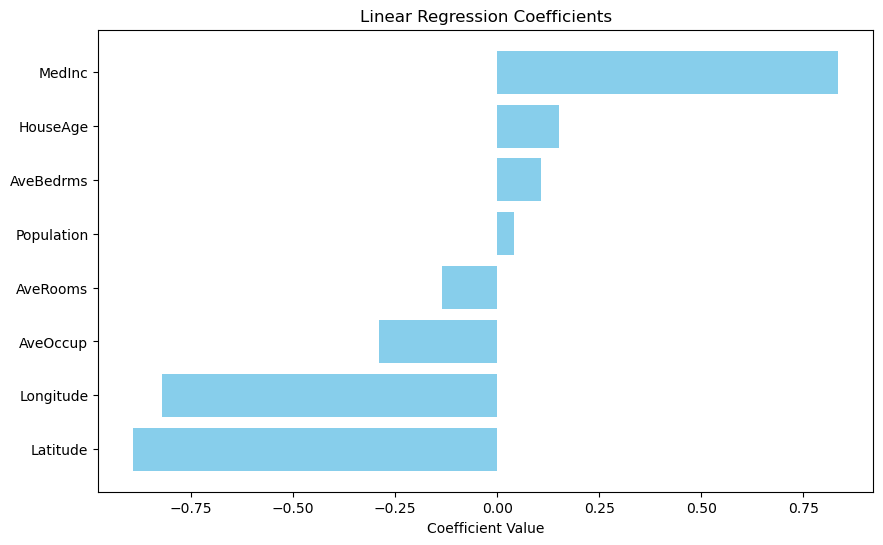

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

#Create a DataFrame from the model coefficients
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", ascending=False)

print(coef_df)

# Plot a bar chart to compare feature importanceا
plt.figure(figsize=(10,6))
plt.barh(coef_df["Feature"], coef_df["Coefficient"], color="skyblue")
plt.xlabel("Coefficient Value")
plt.title("Linear Regression Coefficients")
plt.gca().invert_yaxis()
plt.show()

## 14. Ridge Regression

We train a **Ridge Regression** model to include **L2 regularization**, which can help reduce overfitting by penalizing large coefficients.  
Here, `alpha=1.0` controls the strength of regularization.

**Evaluation metrics on the test set:**  
- MSE: 0.389  
- RMSE: 0.624  
- MAE: 0.465  
- R²: 0.689  

Ridge regression shows similar performance to Linear Regression, but with **slightly smaller coefficients**, improving model stability.

In [32]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define Ridge model with a specified alpha (controls regularization strength)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predict on test data
y_pred_ridge = ridge.predict(X_test)

# Calculate evaluation metricsا
mse  = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred_ridge)
r2   = r2_score(y_test, y_pred_ridge)

print(" Ridge Regression Results ".center(40, "-"))
print("MSE :", mse)
print("RMSE:", rmse)
print("MAE :", mae)
print("R2  :", r2)

------- Ridge Regression Results -------
MSE : 0.38944670982057933
RMSE: 0.624056655938048
MAE : 0.4647343450569413
R2  : 0.6886052761868728


## 15. Lasso Regression

Lasso Regression applies **L1 regularization**, which can shrink some coefficients to zero, effectively performing **feature selection**.  
Here, `alpha=0.1` controls the regularization strength.

**Test set performance:**  
- MSE: 0.513 | RMSE: 0.716 | MAE: 0.546 | R²: 0.590  

**Key observations on coefficients:**  
- Important positive: `MedInc`  
- Negative: `AveOccup`  
- Zeroed features: `AveRooms`, `AveBedrms`, `Population`, `Longitude`  

Lasso simplifies the model but may slightly reduce predictive accuracy compared to Ridge or Linear Regression.

In [36]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define Lasso model with alpha=0.1 (you can change and test)
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train, y_train)

# Predict on test data
y_pred_lasso = lasso.predict(X_test)

# Calculate evaluation metricsا
mse  = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred_lasso)
r2   = r2_score(y_test, y_pred_lasso)

print("------- Lasso Regression Results -------")
print("MSE :", mse)
print("RMSE:", rmse)
print("MAE :", mae)
print("R2  :", r2)

# Display feature coefficientsا
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": lasso.coef_
})
print("\nFeature Coefficients:")
print(coef_df)

------- Lasso Regression Results -------
MSE : 0.5125379335029855
RMSE: 0.7159175465812984
MAE : 0.5463381838721413
R2  : 0.590183703643452

Feature Coefficients:
      Feature  Coefficient
0      MedInc     0.692491
1    HouseAge     0.109925
2    AveRooms    -0.000000
3   AveBedrms     0.000000
4  Population     0.000000
5    AveOccup    -0.231682
6    Latitude    -0.044636
7   Longitude    -0.000000


## 16. Model Comparison

Here we summarize the **performance metrics** of the three regression models:

| Model              | MSE     | RMSE   | MAE    | R²     |
|-------------------|---------|--------|--------|--------|
| Linear Regression  | 0.389   | 0.624  | 0.465  | 0.689  |
| Ridge Regression   | 0.389   | 0.624  | 0.465  | 0.689  |
| Lasso Regression   | 0.513   | 0.716  | 0.546  | 0.590  |

**Key insights:**  
- **Linear and Ridge Regression** perform very similarly, with the lowest errors and highest R².  
- **Lasso Regression** shows higher error and lower R² due to coefficient shrinkage, which simplifies the model but slightly reduces accuracy.  
- Choosing between Ridge and Lasso depends on whether **feature selection** or **predictive accuracy** is more important.

In [38]:
import pandas as pd

# We manually enter the metric results here (from your previous outputs).
results = {
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression"],
    "MSE":  [0.3894624287735127, 0.38944670982057933, 0.5125379335029855],
    "RMSE": [0.6240692499823338, 0.624056655938048, 0.7159175465812984],
    "MAE":  [0.46475960770020514, 0.4647343450569413, 0.5463381838721413],
    "R2":   [0.6885927075892087, 0.6886052761868728, 0.590183703643452]
}

df_results = pd.DataFrame(results)
print(df_results)

               Model       MSE      RMSE       MAE        R2
0  Linear Regression  0.389462  0.624069  0.464760  0.688593
1   Ridge Regression  0.389447  0.624057  0.464734  0.688605
2   Lasso Regression  0.512538  0.715918  0.546338  0.590184


## 17. Comparison of Feature Coefficients

We compare the **coefficients of Linear, Ridge, and Lasso Regression** to understand how regularization affects feature importance.

**Observations:**  
- **Linear vs Ridge:** Coefficients are almost identical, showing Ridge’s L2 regularization slightly shrinks values.  
- **Lasso:** Many coefficients are reduced to zero (`AveRooms`, `AveBedrms`, `Population`, `Longitude`), performing **feature selection**.  
- Features like `MedInc` remain the strongest positive predictors, while `Latitude` and `Longitude` have negative impacts.

**Visualization:**  
A bar chart helps quickly compare coefficient values across models, highlighting how **regularization influences feature weights**.

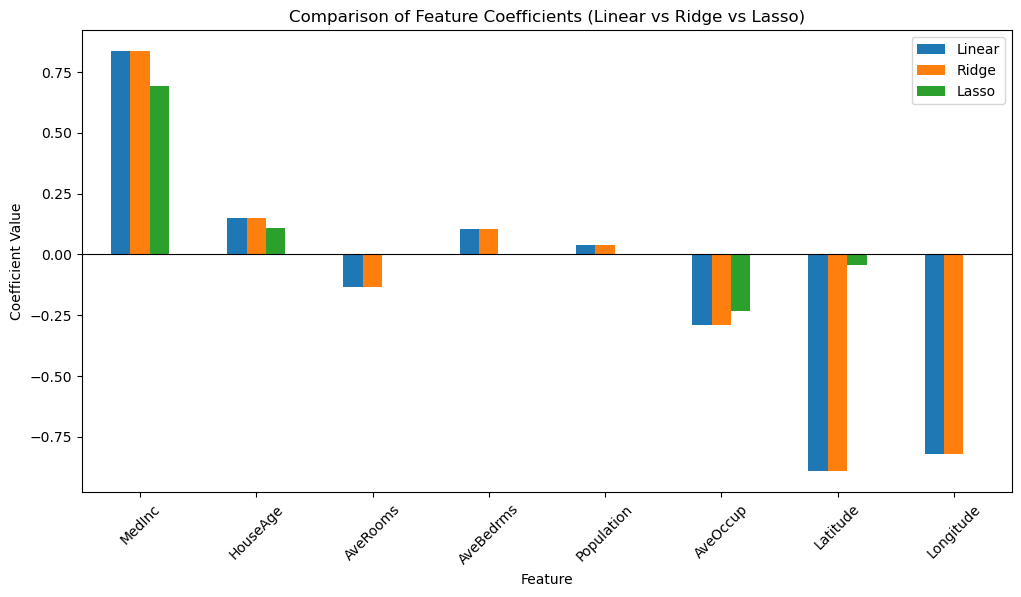

      Feature    Linear     Ridge     Lasso
0      MedInc  0.835365  0.835472  0.692491
1    HouseAge  0.150473  0.150557  0.109925
2    AveRooms -0.134596 -0.134676 -0.000000
3   AveBedrms  0.106153  0.106140  0.000000
4  Population  0.040037  0.040064  0.000000
5    AveOccup -0.288662 -0.288665 -0.231682
6    Latitude -0.891827 -0.890730 -0.044636
7   Longitude -0.822329 -0.821245 -0.000000


In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Model coefficientsا
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Linear": lr.coef_,
    "Ridge": ridge.coef_,
    "Lasso": lasso.coef_
})

# Plot a bar chart
coef_df.set_index("Feature").plot(kind="bar", figsize=(12,6))
plt.axhline(0, color="black", linewidth=0.8)
plt.title("Comparison of Feature Coefficients (Linear vs Ridge vs Lasso)")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Display the coefficient table for more accuracy
print(coef_df)

## 18. Random Forest Regression

We train a **Random Forest Regressor**, an ensemble method that combines multiple decision trees to improve predictive performance and reduce overfitting.

**Parameters:**  
- `n_estimators=100`: number of trees in the forest  
- `random_state=42`: ensures reproducibility  
- `n_jobs=-1`: uses all CPU cores for faster computation

**Test set performance:**  
- MSE: 0.219  
- RMSE: 0.468  
- MAE: 0.310  
- R²: 0.825  

Random Forest achieves **better predictive accuracy** than Linear, Ridge, or Lasso Regression, thanks to its ability to capture **non-linear relationships** in the data.

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Random Forest model
rf = RandomForestRegressor(
    n_estimators=100,   # Number of treesا
    random_state=42,
    n_jobs=-1           # Use all CPU cores for faster computation
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Calculate the metrics
mse_rf  = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf  = mean_absolute_error(y_test, y_pred_rf)
r2_rf   = r2_score(y_test, y_pred_rf)

print("------- Random Forest Results -------")
print("MSE :", mse_rf)
print("RMSE:", rmse_rf)
print("MAE :", mae_rf)
print("R2  :", r2_rf)

------- Random Forest Results -------
MSE : 0.21879589498326335
RMSE: 0.46775623457444515
MAE : 0.31004876471949117
R2  : 0.8250546594137409


## 19. Random Forest Evaluation & Feature Importances

We further analyze the **Random Forest** model with three key visualizations:

1. **Actual vs Predicted:**  
   - Scatter plot comparing predicted values to actual targets.  
   - Points close to the red dashed line indicate accurate predictions.

2. **Residuals vs Predicted:**  
   - Shows the difference between actual and predicted values.  
   - Residuals randomly scattered around zero indicate good model fit.

3. **Feature Importances:**  
   - Random Forest calculates how much each feature contributes to predictions.  
   - Observations:  
     - `MedInc` is by far the most influential feature (~0.51).  
     - `AveOccup`, `Longitude`, and `Latitude` also play important roles.  
     - Other features have smaller but non-negligible contributions.

These plots and values help us **interpret the model** and understand which features drive predictions the most.

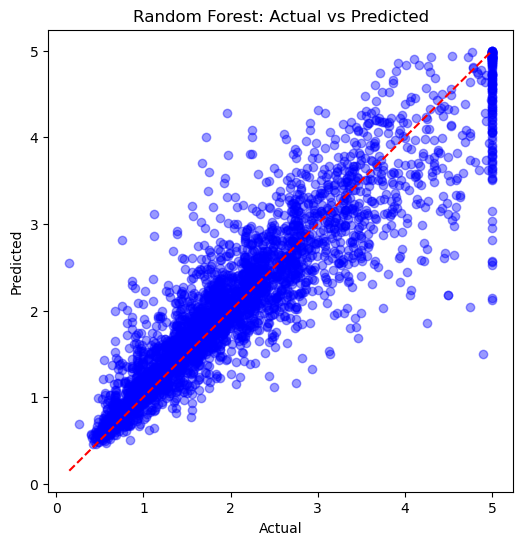

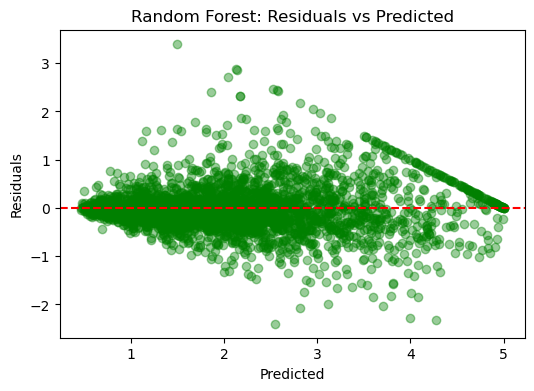

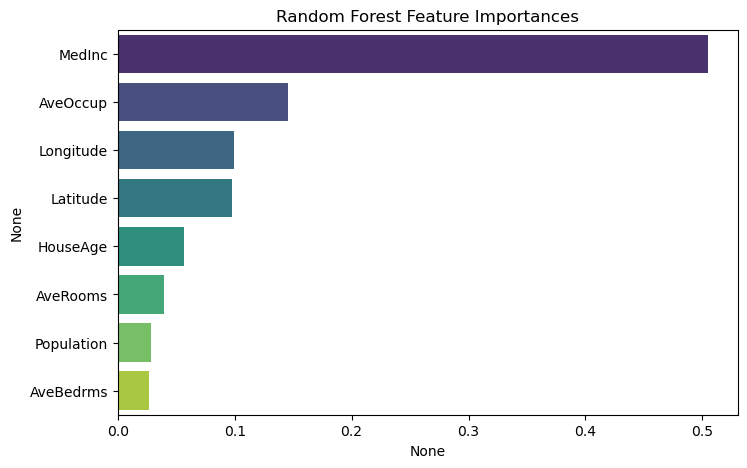

Feature Importances:
MedInc        0.505054
AveOccup      0.145698
Longitude     0.099404
Latitude      0.098023
HouseAge      0.056765
AveRooms      0.039916
Population    0.028650
AveBedrms     0.026490
dtype: float64


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.4, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random Forest: Actual vs Predicted")
plt.show()

# 2. Residuals plot
residuals = y_test - y_pred_rf
plt.figure(figsize=(6,4))
plt.scatter(y_pred_rf, residuals, alpha=0.4, color="green")
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Random Forest: Residuals vs Predicted")
plt.show()

# 3. Feature Importances
# 3. Feature Importances (Without Warning)
importances = rf.feature_importances_
features = X_train.columns
feat_importances = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(
    x=feat_importances,
    y=feat_importances.index,
    hue=feat_importances.index,  # اAdded to suppress warnings
    palette="viridis",
    dodge=False,
    legend=False
)
plt.title("Random Forest Feature Importances")
plt.show()

print("Feature Importances:")
print(feat_importances)